Random forest is believed to mitigate the problem of overfitting that usually occurs in decision tree. It works by taking a random sample of the dataset and build an ongoing series of decision trees on the subset. 

parameters to be set: node size, number of trees, number of features

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('credit-risk-dataset.csv')
df.shape

(5000, 21)

In [3]:
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [4]:
df.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

# Convert pandas dataframe into numpy arrays

In [5]:
one_hot_encoder = OneHotEncoder() # expect 2D array
label_encoder = LabelEncoder() # expect 1D array

Categorical features

In [6]:
df[['CheckingStatus']].value_counts()

CheckingStatus
no_checking       1993
less_0            1398
0_to_200          1304
greater_200        305
Name: count, dtype: int64

In [7]:
CheckingStatus_encoded = label_encoder.fit_transform(df['CheckingStatus']).reshape(-1,1)

In [8]:
df['CreditHistory'].value_counts()

CreditHistory
prior_payments_delayed    1686
credits_paid_to_date      1490
outstanding_credit         938
all_credits_paid_back      769
no_credits                 117
Name: count, dtype: int64

In [9]:
CreditHistory_encoded = one_hot_encoder.fit_transform(df[['CreditHistory']]).toarray()

In [10]:
df['ExistingSavings'].value_counts()

ExistingSavings
less_100        1856
100_to_500      1133
500_to_1000     1078
greater_1000     558
unknown          375
Name: count, dtype: int64

In [11]:
ExistingSavings_encoded = label_encoder.fit_transform(df['ExistingSavings']).reshape(-1,1)

In [12]:
df['Housing'].value_counts()

Housing
own     3195
rent    1066
free     739
Name: count, dtype: int64

In [13]:
Housing_encoded = one_hot_encoder.fit_transform(df[['Housing']]).toarray()

In [14]:
df['Job'].value_counts()

Job
skilled                     3400
unskilled                    673
management_self-employed     641
unemployed                   286
Name: count, dtype: int64

In [15]:
Job_encoded = one_hot_encoder.fit_transform(df[['Job']]).toarray()

Quantitative features

In [16]:
numerical_features = df[['LoanDuration','LoanAmount', 'Age']].values

Form X array

In [17]:
X = np.concatenate([CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded, numerical_features], axis = 1)
print(type(X))

<class 'numpy.ndarray'>


Y array

In [18]:
y = label_encoder.fit_transform(df[['Risk']])
print(type(y))

<class 'numpy.ndarray'>


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Modeling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.4 , random_state = 1)
print(f'Train set: {X_train.shape} , {y_train.shape}')
print(f'Test set: {X_test.shape} , {y_test.shape}')

Train set: (3000, 17) , (3000,)
Test set: (2000, 17) , (2000,)


In [20]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [21]:
y_prediction = rf.predict(X_test)

In [22]:
print(y_prediction[0:5])
print(y_test[0:5])

[0 1 0 0 0]
[0 1 1 0 0]


# Model Evaluation

In [23]:
accuracy_y = metrics.accuracy_score(y_test, y_prediction)
print(f'Accuracy on y test: {accuracy_y}')

Accuracy on y test: 0.7575


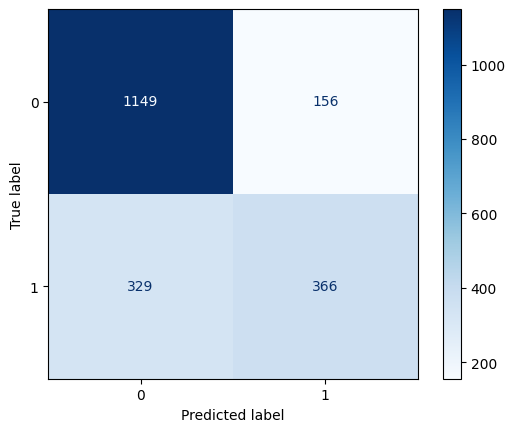

In [24]:
cm = confusion_matrix(y_test, y_prediction, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()